# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

In [2]:
C = 1  
kernel = 'linear'  
iterations = 5000  
n_neighbors = 5  
max_depth = 9

In [3]:
# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

In [4]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        a = model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:

        score = a.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

In [6]:
X = pd.read_csv("Datasets/wheat.data", index_col=0)
X.head(10)

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,kama
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,kama
7,14.11,14.10,0.8911,5.420,3.302,2.700,NaN,canadian
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,kama


In [7]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [8]:
X.dropna(axis=0, how = 'any', inplace=True)
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,


In [9]:
y = X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
print(X.head(6))
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

     area  perimeter  compactness  length  width  asymmetry  groove
id                                                                 
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175
5   14.38      14.21       0.8951   5.386  3.312      2.462   4.956


In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = n_neighbors)

In [13]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = 2)

In [14]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

KNeighbors Results
5000 Iterations Training Time:  1.5671672821044922
5000 Iterations Scoring Time:  3.7409486770629883
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


In [15]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

SVC Results
5000 Iterations Training Time:  3.3328983783721924
5000 Iterations Scoring Time:  1.2593498229980469
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


In [16]:
benchmark(dtree, X_train, X_test, y_train, y_test, 'Tree')
drawPlots(dtree, X_train, X_test, y_train, y_test, 'Tree')

Tree Results
5000 Iterations Training Time:  2.744319438934326
5000 Iterations Scoring Time:  1.0578067302703857
High-Dimensionality Score:  91.803
Max 2D Score:  90.164


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


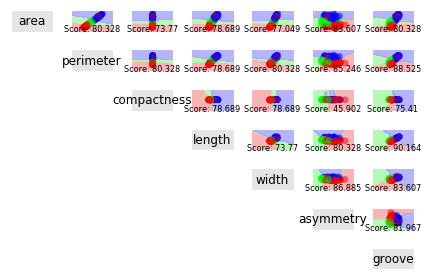

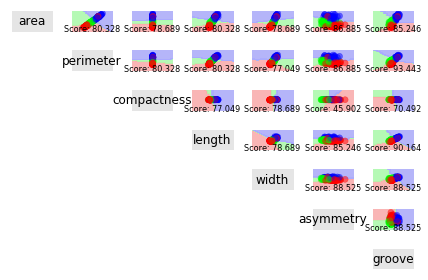

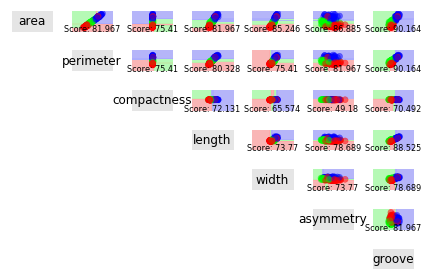

In [17]:
plt.show()